<a href="https://colab.research.google.com/github/Shamika2021/PortfolioProjects/blob/main/OGTIP_final_project_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##OGTIP FINAL PROJECT

We are given the handwritten data set of a popular language alphabets that contains various handwritten scripts for each individual alphabet of that language taken from different individuals in real time. Data is processed and given to you to prepare a machine learning model to identify each letter correctly. Our goal is to prepare a model that can classify the letters with high accuracy.


**Import Libraries**

Let's first import all the libraries.

In [ ]:
# data processing
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from keras.utils import np_utils

import zipfile
import random
import csv

#avoid any kind of warnings
import warnings
warnings.filterwarnings("ignore")

**Read in the Data**

Special Note: Unfortunately while importing the data set due to it's size my colab session keep on crashing, so i had to only import part of the data set as a sample.

In [ ]:
#load the dataset
n = 372450
s = 100000
filename = "/content/drive/MyDrive/A_Z Handwritten Data.csv"
skip = sorted(random.sample(range(n),n-s))
df = pd.read_csv(filename, skiprows=skip)
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since we specially imported only 100000 rows from the original data set, this should be reflected in the shape of the data frame.

In [ ]:
print(df.shape)

(100000, 785)


**Seperating label column and image details columns**

Next i am going to seperate the label column and image pixel details columns for the purpose of further analysis.

In [ ]:
#target column
y = df["0"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

In [ ]:
#image data columns
x = df.drop("0", axis = 1)
x.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(x.shape)

(100000, 784)


An array is created to store the actucal label value for each alphabet characters.

In [ ]:
#actual characters array of y
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

* The x contains one dimentional data but for the purpose of our analysis and to identify whether the images have been write in correctly we have to convert it to an array of 28x28.
* A random row is selected to confirm whether the label value and the row data match with each other or not.

In [ ]:
random_character = x.iloc[[30]]
random_character_reshaped = random_character.values.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

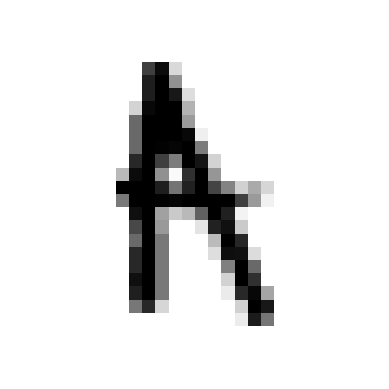

In [ ]:
#plotting the image
plt.imshow(random_character_reshaped, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

According to this row 30 contains handwritten character 'A'.

In [ ]:
#character that contains in the y
alphabet[y.iloc[30]]

'A'

This confirms that the file has been read in correctly.

**Splitting the data set into training and testing data**

Next we are going to split the data set into training and testing sets.

In [ ]:
#split the dataset into test and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle = True)

**Displaying the images and the labels**

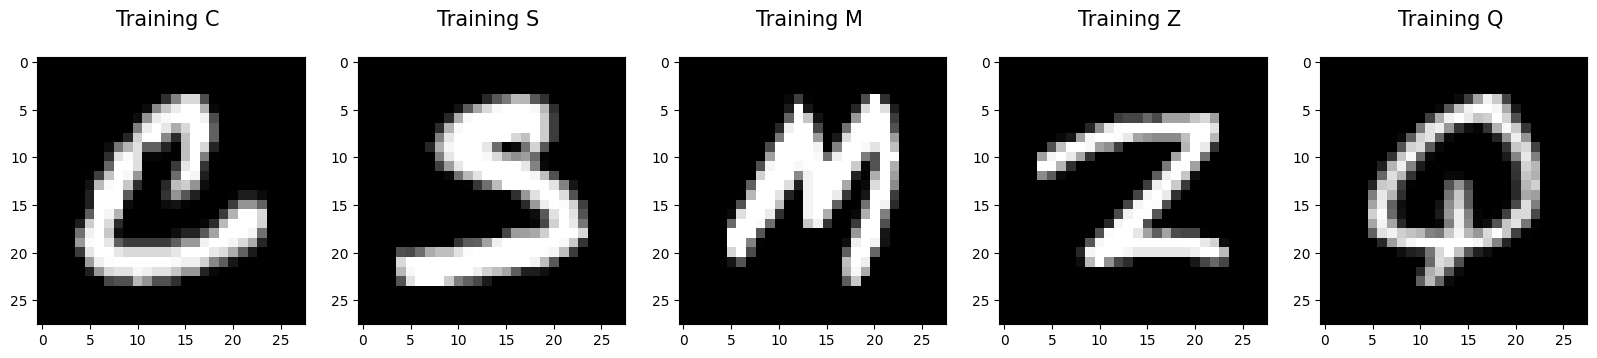

In [ ]:
plt.figure(figsize=(20,4))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  image = x_train.iloc[[i]]
  image = image.values.reshape(28,28)
  plt.imshow(image, cmap = plt.cm.gray)
  label = alphabet[y_train.iloc[i]]
  plt.title(f"Training {label} \n", fontsize=15)


This further confirms that data has been fed in correctly.

**Understanding the Data set**

Next let's visualy understand the distribution of each character in the data set.

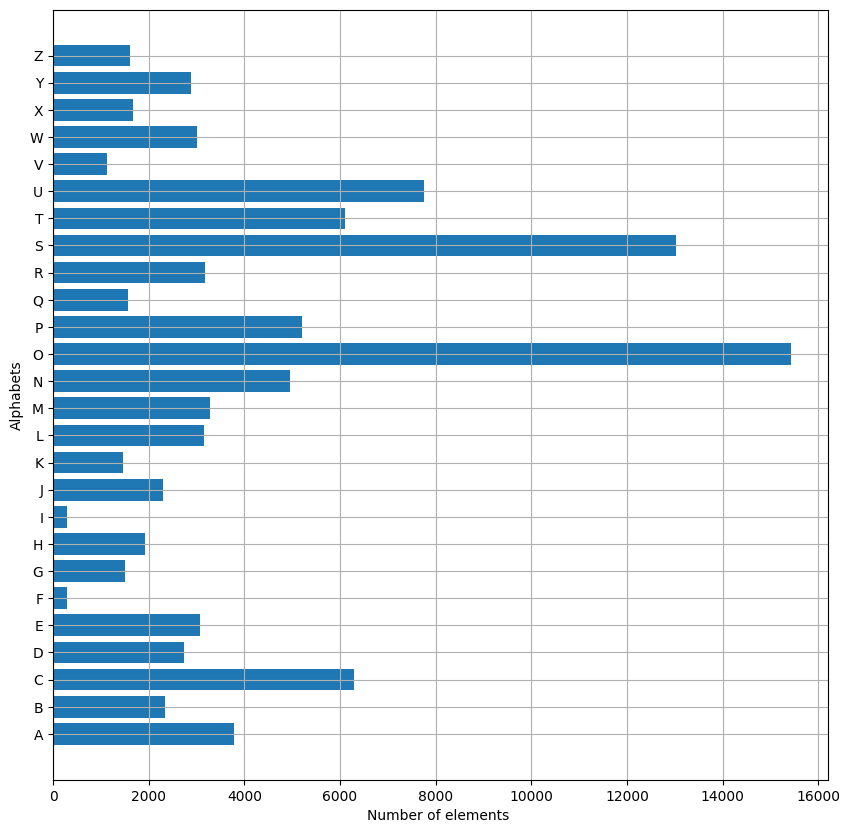

In [ ]:
y_int = np.int0(y)
count = np.zeros(26, dtype = 'int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in alphabet:
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

## Building a 'A' Detector

Before training the model for all the characters in the alphabet, let's first train model to identify only the character 'A'.

In [ ]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_A = (y_train == 0)
y_test_A = (y_test == 0)

In [ ]:
y_train_A

10382    False
73171    False
30938    False
99310    False
58959    False
         ...  
21243    False
45891    False
42613    False
43567    False
68268    False
Name: 0, Length: 80000, dtype: bool

In [ ]:
log_clf = LogisticRegression(tol = 0.1)

In [ ]:
np.isnan(x_train).sum()

0.1      0
0.2      0
0.3      0
0.4      0
0.5      0
        ..
0.580    0
0.581    0
0.582    0
0.583    0
0.584    0
Length: 784, dtype: int64

In [ ]:
log_clf.fit(x_train, y_train_A)

LogisticRegression(tol=0.1)

Let's test the model on random_character variable, if the it returns true then the model has predicted correctly.

In [ ]:
log_clf.predict(random_character)

array([False])

Unfortunately the model did not predict correctly. But this could be a case of missclassification. Let's check the model accuracy to further confirm how well the model performs. (Note this result could change depending on the random sample)

In [ ]:
cross_val_score(log_clf, x_train, y_train_A, scoring="accuracy")

array([0.978125 , 0.978125 , 0.9801875, 0.9785   , 0.9783125])

Model has an accuracy around 97.83%, which is really good. (Note this result could change depending on the random sample)

**Training the Model**

In [ ]:
#creating a new instance of the regression model
clf = LogisticRegression(solver = 'lbfgs')

In [ ]:
clf.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# predict the labels of new data(new images)
test = x_test.iloc[[0]]
clf.predict(test.values.reshape(1, -1))

array([0], dtype=int8)

In [ ]:
#checking the validity of prediction
y_test.iloc[0]

0

It turns out to be an accurate prediction. Let's further investigate to confrim whether model performs well or not. (Note this result could change depending on the random sample)

In [ ]:
# predict for multiple observation(many images)
print("Predicted labels")
my_pred = clf.predict(x_test[0:10])
print(my_pred)
print("\nTrue Labels")
y_test[0:10]

Predicted labels
[ 0 17 15  7  1 14 20  2 17 14]

True Labels


3582      0
60498    17
53227    15
21333     7
3885      1
51521    14
84261    20
10685     2
59948    17
41032    14
Name: 0, dtype: int8

Out of 10 predictions all of them turn out be correct, we can accept this model as considerably well performing model. (Note this result could change depending on the random sample)

In [ ]:
# make prediction on entire dataset
predictions = clf.predict(x_test)

## Measuring Model Accuracy

In [ ]:
score = clf.score(x_test, y_test)
print(f"accuracy score : {score}")

accuracy score : 0.8734


Overall model has performed well considering the accuracy of 87.34%. (Note this result could change depending on the random sample)

## Misclassified labels vs Actual labels

In [ ]:
index = 0
misclassified_img = []
for label, predict in zip(y_test, predictions):
  if label != predict:
    misclassified_img.append(index)
  index += 1

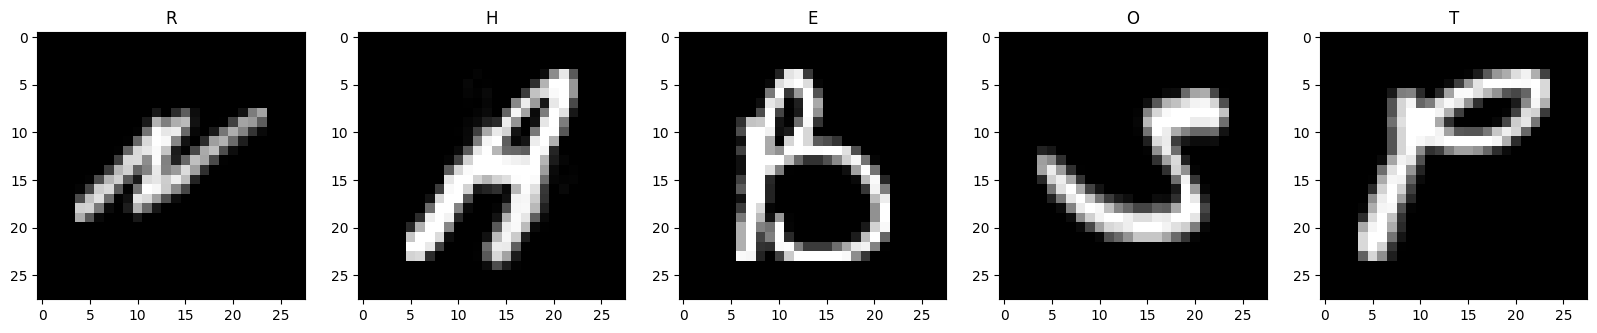

In [ ]:
plt.figure(figsize = (20,4))
for plotindex, misindex in enumerate(misclassified_img[0:5]):
  plt.subplot(1, 5, plotindex + 1)
  M = x_test.iloc[[misindex]]
  plt.imshow(np.reshape(M.values, (28,28)), cmap = plt.cm.gray)
  plt.title(alphabet[predictions[misindex]])

It seems like when the characters exihibits cursive patterns, the model have a difficulty understanding this characters and end up misclassifying them. Let's use a CNN algorithm and try to improve the accuracy of the model.

##Convolutional Neural Networks

Let's further improve the model using convolutional neural networks.

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle = True)

In [ ]:
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

**Reshaping the data set**

We are going to reshape the data set before feeding into model.

In [ ]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (80000, 28, 28, 1)
New shape of train data:  (20000, 28, 28, 1)


Since CNN model accepts categorical values, we are going convert the data columns into categorical values.

In [ ]:
train_y_converted = to_categorical(train_y, num_classes = 26, dtype='int')
train_y_converted.shape

(80000, 26)

In [ ]:
test_y_converted = to_categorical(test_y, num_classes = 26, dtype='int')
test_y_converted.shape

(20000, 26)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))



model.compile(optimizer = Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history = model.fit(train_X, train_y_converted, epochs=1, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_y_converted))


model.summary()
model.save(r'model_hand.h5')

2500/2500 [==============================] - 130s 52ms/step - loss: 0.3470 - accuracy: 0.9116 - val_loss: 0.1404 - val_accuracy: 0.9581 - lr: 0.0010
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4

In [ ]:
history.history

{'loss': [0.3469611704349518],
 'accuracy': [0.9116374850273132],
 'val_loss': [0.1404435634613037],
 'val_accuracy': [0.9581000208854675],
 'lr': [0.001]}

Accuracy have improve considerably well compared to general machine learning algorithms.